In [ ]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

ROOT_DIR = '/content/drive/MyDrive/ML'

In [ ]:
!apt-get install protobuf-compiler python-lxml python-pil
!pip install Cython pandas tf-slim lvis

Reading package lists... Done
Building dependency tree       
Reading state information... Done
protobuf-compiler is already the newest version (3.0.0-9.1ubuntu1).
The following additional packages will be installed:
  python-bs4 python-chardet python-html5lib python-olefile
  python-pkg-resources python-six python-webencodings
Suggested packages:
  python-genshi python-lxml-dbg python-lxml-doc python-pil-doc python-pil-dbg
  python-setuptools
The following NEW packages will be installed:
  python-bs4 python-chardet python-html5lib python-lxml python-olefile
  python-pil python-pkg-resources python-six python-webencodings
0 upgraded, 9 newly installed, 0 to remove and 30 not upgraded.
Need to get 1,615 kB of archives.
After this operation, 8,907 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 python-bs4 all 4.6.0-1 [67.9 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 python-pkg-resources all 39.0.1-2 [128 kB]
Get:3 http:/

In [ ]:

os.chdir(f'{ROOT_DIR}/TFModels/research')

!protoc object_detection/protos/*.proto --python_out=.

!python setup.py build
!python setup.py install


running build
running build_py
copying object_detection/protos/anchor_generator_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/box_coder_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/box_predictor_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/bipartite_matcher_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/argmax_matcher_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/calibration_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/eval_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/center_net_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/faster_rcnn_box_coder_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/faster_rcnn_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/flexible_grid_anchor_generator_pb2.py -> 

In [ ]:

# Test the installation.
!python {ROOT_DIR}/TFModels/research/object_detection/builders/model_builder_tf2_test.py


2021-03-21 13:13:05.541662: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
Running tests under Python 3.7.10: /usr/bin/python3
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_model
2021-03-21 13:13:08.514550: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-03-21 13:13:08.515790: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-03-21 13:13:08.573361: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-03-21 13:13:08.574013: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P4 computeCapability: 6.1
coreClock: 1.1135GHz coreCount: 20 deviceMemorySize: 7.43GiB dev

In [ ]:
!python {ROOT_DIR + '/Utils/generate_tfrecord.py'} \
        {ROOT_DIR + '/Data/test.csv'} \
        {ROOT_DIR + '/Data/label_map.pbtxt'} \
        {ROOT_DIR + '/Data/test/'} \
        {ROOT_DIR + '/Data/test.tfrecord'}

!python {ROOT_DIR + '/Utils/generate_tfrecord.py'} \
        {ROOT_DIR + '/Data/train_n.csv'} \
        {ROOT_DIR + '/Data/label_map.pbtxt'} \
        {ROOT_DIR + '/Data/train/'} \
        {ROOT_DIR + '/Data/train.tfrecord'}


2021-03-21 13:17:29.826898: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
groups: 100% 41/41 [00:08<00:00,  4.97it/s]
Successfully created the TFRecords: /content/drive/MyDrive/ML/Data/test.tfrecord
2021-03-21 13:17:40.304170: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
groups: 100% 480/480 [02:58<00:00,  2.69it/s]
Successfully created the TFRecords: /content/drive/MyDrive/ML/Data/train.tfrecord


In [ ]:

#wget.download('http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz')
#!mv ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz {ROOT_DIR + '/utils/pre-trained-models'}
#!cd {ROOT_DIR + '/utils/pre-trained-models'} && tar -zxvf ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz


In [ ]:
# !cp {ROOT_DIR+'/Utils/pre-trained-models/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/pipeline.config'} {ROOT_DIR+'/Model'}

In [ ]:
os.chdir(ROOT_DIR)

In [ ]:
!python TFModels/research/object_detection/model_main_tf2.py \
        --model_dir={ROOT_DIR + '/Model'} \
        --pipeline_config_path={ROOT_DIR + '/Model/pipeline.config'} \
        --num_train_steps=20000 \
        -w ignore 

INFO:tensorflow:Step 7100 per-step time 0.542s loss=0.200
I0321 14:42:25.721553 140457062836096 model_lib_v2.py:670] Step 7100 per-step time 0.542s loss=0.200
INFO:tensorflow:Step 7200 per-step time 0.625s loss=0.184
I0321 14:43:22.711119 140457062836096 model_lib_v2.py:670] Step 7200 per-step time 0.625s loss=0.184
INFO:tensorflow:Step 7300 per-step time 0.542s loss=0.205
I0321 14:44:20.153782 140457062836096 model_lib_v2.py:670] Step 7300 per-step time 0.542s loss=0.205
INFO:tensorflow:Step 7400 per-step time 0.540s loss=0.192
I0321 14:45:17.165694 140457062836096 model_lib_v2.py:670] Step 7400 per-step time 0.540s loss=0.192
INFO:tensorflow:Step 7500 per-step time 0.493s loss=0.168
I0321 14:46:13.847833 140457062836096 model_lib_v2.py:670] Step 7500 per-step time 0.493s loss=0.168
INFO:tensorflow:Step 7600 per-step time 0.534s loss=0.257
I0321 14:47:11.325584 140457062836096 model_lib_v2.py:670] Step 7600 per-step time 0.534s loss=0.257
INFO:tensorflow:Step 7700 per-step time 0.528s

In [ ]:

from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.utils import ops as utils_ops

from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format
from object_detection.builders import model_builder


In [ ]:

# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(ROOT_DIR + '/Model/pipeline.config')
detection_model = model_builder.build(model_config=configs['model'], is_training=False)


In [ ]:

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(ROOT_DIR+'/Model1/', 'ckpt-6')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

In [ ]:

image_np = plt.imread(ROOT_DIR+'/Data/test/mixed_23.jpg')

In [ ]:
input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

category_index = label_map_util.create_category_index_from_labelmap(ROOT_DIR + '/Data/label_map.pbtxt')

In [ ]:

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)


num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

image_np_with_detections = viz_utils.visualize_boxes_and_labels_on_image_array(
                            image_np_with_detections,
                            detections['detection_boxes'],
                            detections['detection_classes']+label_id_offset,
                            detections['detection_scores'],
                            category_index,
                            use_normalized_coordinates=True,
                            max_boxes_to_draw=5,
                            min_score_thresh=.5,
                            agnostic_mode=False)



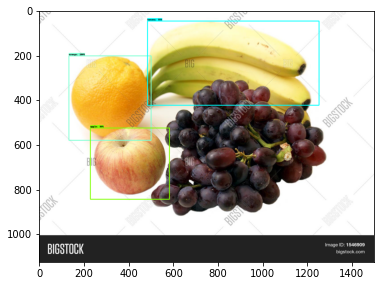

In [ ]:
plt.figure(figsize=(6,6))
plt.imshow(image_np_with_detections)